In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [4]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [5]:
# Combine the data into a single dataset
pyber_data = pd.merge(ride_data, city_data, on=['city'])

In [6]:
# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [7]:
pyber_data.groupby(['city']).min()['type'].head()

city
Amandaburgh         Urban
Barajasview         Urban
Barronchester    Suburban
Bethanyland      Suburban
Bradshawfurt        Rural
Name: type, dtype: object

In [8]:
# Obtain the x and y coordinates for each of the three city types
# x coordinate = total number of rides per city

grouped_data = pyber_data.groupby(['type', 'city'])
grouped_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban
24,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
25,South Michelleport,2018-03-02 09:54:50,33.12,813844006721,72,Urban
26,South Michelleport,2018-01-08 09:38:14,23.77,4916160406018,72,Urban
27,South Michelleport,2018-04-22 03:15:33,43.62,4663606096929,72,Urban
28,South Michelleport,2018-03-03 16:13:34,41.62,2339775503972,72,Urban


In [9]:
city_data = pd.DataFrame(grouped_data['ride_id'].count())
city_data.head()

ride_id
type  city                   
Rural Bradshawfurt         10
      Garzaport             3
      Harringtonfort        6
      Jessicaport           6
      Lake Jamie            6

In [10]:
city_data['average_fare'] = grouped_data['fare'].mean()

In [11]:
city_data['type'] = grouped_data['type'].min()

In [12]:
city_data['total_fare'] = grouped_data['fare'].sum()

In [13]:
city_data['driver_count'] = grouped_data['driver_count'].min()
city_data = city_data.rename(columns=({
    'ride_id':'ride_count'
}))
city_data[['total_fare', 'ride_count', 'average_fare', 'type', 'driver_count']].head()

total_fare  ride_count  average_fare   type  \
type  city                                                          
Rural Bradshawfurt        400.64          10     40.064000  Rural   
      Garzaport            72.37           3     24.123333  Rural   
      Harringtonfort      200.82           6     33.470000  Rural   
      Jessicaport         216.08           6     36.013333  Rural   
      Lake Jamie          206.15           6     34.358333  Rural   

                      driver_count  
type  city                          
Rural Bradshawfurt               7  
      Garzaport                  7  
      Harringtonfort             4  
      Jessicaport                1  
      Lake Jamie                 4

In [14]:
# Split grouped city data by type
urban_data = city_data.loc[city_data['type'] == 'Urban']
suburban_data = city_data.loc[city_data['type'] == 'Suburban']
rural_data = city_data.loc[city_data['type'] == 'Rural']

SCATTER PLOT

In [ ]:
# Build the scatter plots for each city types
plt.scatter(urban_data['ride_count'], urban_data['average_fare'], 
            marker="o", s=urban_data['driver_count'] * 5, facecolors="red", edgecolors="black", alpha=0.5, label='Urban')
plt.scatter(suburban_data['ride_count'], suburban_data['average_fare'], 
            marker="o", s=suburban_data['driver_count'] * 5, facecolors="blue", edgecolors="black", alpha=0.5, label='Suburban')
plt.scatter(rural_data['ride_count'], rural_data['average_fare'], 
            marker="o", s=rural_data['driver_count'] * 5, facecolors="yellow", edgecolors="black", alpha=0.5, label='Rural')

In [ ]:
# Add title, labels
plt.xlim(0,40)
plt.grid()
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')

In [ ]:
# Add note about circle size
plt.gcf().text(.95, .85,'Note: Circle size correlates with driver count per city', 
               fontsize=10, stretch='condensed', rotation='vertical')

In [ ]:
# Create legend
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
plt.show()


In [ ]:
# Save figure
plt.savefig("../Images/PyberScatter.png")

## Total Fares by City Type

In [ ]:
# Calculate Type Percents
urban_fares = urban_data['total_fare'].sum()
suburban_fares = suburban_data['total_fare'].sum()
rural_fares = rural_data['total_fare'].sum()
total_fares = round((urban_fares + suburban_fares + rural_fares),2)
# Save Figure


In [ ]:
type_labels = ['Urban Fares', 'Suburban Fares', 'Rural Fares']
sizes = [urban_fares, suburban_fares, rural_fares]
colors = ['red', 'xkcd:sky blue', 'yellow']
explode = (0.1, 0, 0)

In [ ]:
# Build Pie Chart
plt.pie(sizes, explode=explode, labels=type_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)

plt.axis('equal')
plt.title('% of Total Fares by City Type')
plt.show()

In [ ]:
plt.savefig("../Images/TotalFarePieChart.png")

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents
urban_rides = urban_data['ride_count'].sum()
suburban_rides = suburban_data['ride_count'].sum()
rural_rides = rural_data['ride_count'].sum()
total_rides = urban_rides + suburban_rides + rural_rides

type_labels = ['Urban Rides', 'Suburban Rides', 'Rural Rides']
sizes = [urban_rides, suburban_rides, rural_rides]
colors = ['red', 'xkcd:sky blue', 'yellow']
explode = (0.1, 0, 0)

In [ ]:
# Build Pie Chart
plt.pie(sizes, explode=explode, labels=type_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)

plt.axis('equal')
plt.title('% of Total Rides by City Type')
plt.show()

plt.show()

In [ ]:
plt.savefig("../Images/TotalRidesPieChart.png")

## Total Drivers by City Type

In [15]:
# Calculate Driver Percents
urban_drivers = urban_data['driver_count'].sum()
suburban_drivers = suburban_data['driver_count'].sum()
rural_drivers = rural_data['driver_count'].sum()
total_drivers = urban_drivers + suburban_drivers + rural_drivers

type_labels = ['Urban Drivers', 'Suburban Drivers', 'Rural Drivers']
sizes = [urban_drivers, suburban_drivers, rural_drivers]
colors = ['red', 'xkcd:sky blue', 'yellow']
explode = (0.1, 0, 0)

<IPython.core.display.Javascript object>


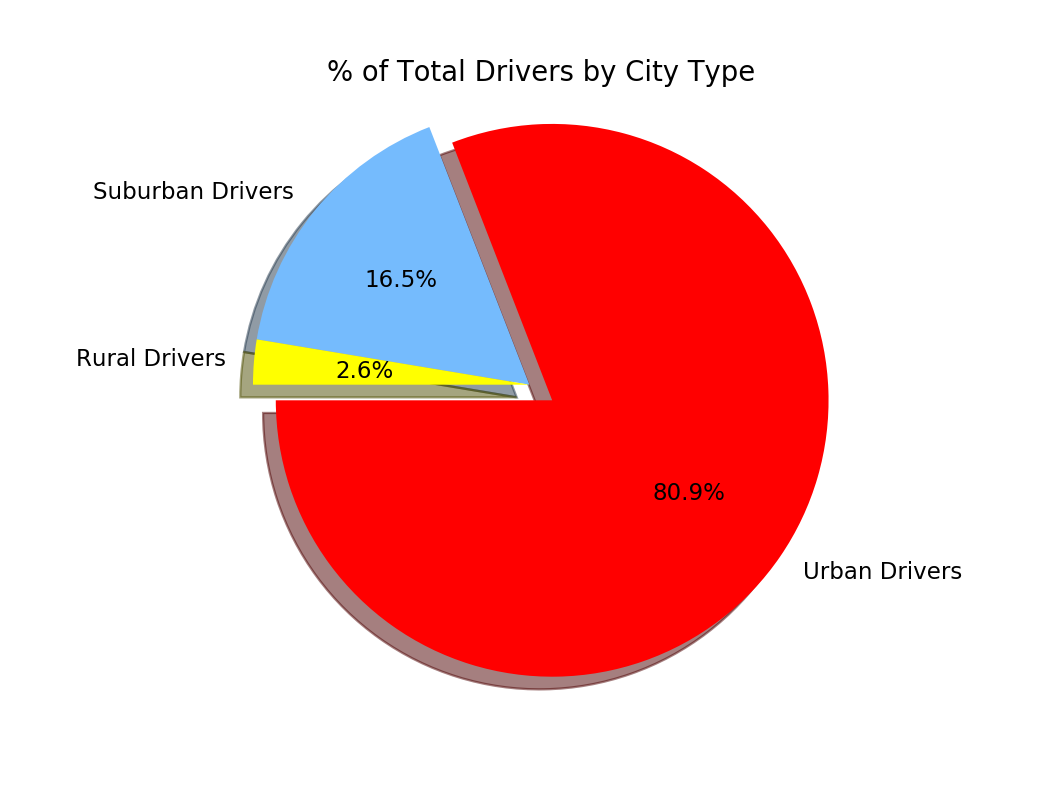

Text(0.5,1,'% of Total Drivers by City Type')

In [16]:
# Build Pie Chart
plt.pie(sizes, explode=explode, labels=type_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis('equal')
plt.title('% of Total Drivers by City Type')

In [17]:
# Save Figure
plt.savefig("../Images/TotalDriversPieChart.png")